In [1]:
# Import required libraries

import os
import logging

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt, ticker


# Import required data from laboratory experimentation
The idea is load data for specific flow rate, process data, calculate statistics and compare with CFD data.

In [2]:
# Experimental data (Is possible change Q for corresponding value to load data) ex = Q1
import_route = 'C:\\Users\\sqmac\\PycharmProjects\\golpe_ariete\Data\Patrones\Q1'
list_dir = os.listdir(import_route)

# Calculate number of measurements
n_m = len(list_dir)
measurement_names = ['m' + str(i) for i in range(1, n_m)]

# Create time column for experimental df
dt = 0.005
t_f = 30
t = np.arange(dt, t_f + dt, dt).tolist()
df_exp = pd.DataFrame()
df_exp['time'] = t

# Import data for every test and join into df
for measure_n, file in enumerate(list_dir):
    # Read corresponding data_measure
    df_mesure = pd.read_csv(os.path.join(import_route, file))

    # Save into df
    c_name = 'm' + str(measure_n + 1)
    df_exp[c_name] = df_mesure.iloc[:, 1] * 1000 # convert pressure from: kPa - Pa


In [3]:
# CFD data
cfd_q = 1
df_cfd = pd.read_csv('C:\\Users\\sqmac\\PycharmProjects\\golpe_ariete\Q1_analysis\presion_2.5s.csv', names=['other', 'pressure', 'time'], header=None, sep=' ')
df_cfd.drop('other', inplace=True, axis=1)

# pressure series without data before closing

# cfd data
t_close_cfd = 0.10
t_total_cfd = 2.5
df_cfd_wc = df_cfd[df_cfd['time'] >= t_close_cfd]
df_cfd_wc['time'] = df_cfd_wc['time'] - t_close_cfd # move time to zero

# experimental data
t_close_exp = 1.13
df_exp = df_exp[(df_exp['time'] >= t_close_exp) & (df_exp['time'] <= t_close_exp + t_total_cfd - t_close_cfd)]
df_exp['time'] = df_exp['time'] - t_close_exp # move time to zero


C:\Users\sqmac\AppData\Local\Temp\ipykernel_13944\4258320427.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfd_wc['time'] = df_cfd_wc['time'] - t_close_cfd # move time to zero


# Exploratory data analysis of experimental data

In [4]:
# Checkout summary of columns (measurements)
print(df_exp.info())
# Data is ok, so is no present Non values

# Checkout column statistics
print(df_exp.describe())
# So, mean value, inter-quartile range and standard deviation is similar for every measurement


<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 225 to 705
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    481 non-null    float64
 1   m1      481 non-null    float64
 2   m2      481 non-null    float64
 3   m3      481 non-null    float64
 4   m4      481 non-null    float64
 5   m5      481 non-null    float64
 6   m6      481 non-null    float64
 7   m7      481 non-null    float64
 8   m8      481 non-null    float64
 9   m9      481 non-null    float64
 10  m10     481 non-null    float64
 11  m11     481 non-null    float64
 12  m12     481 non-null    float64
 13  m13     481 non-null    float64
 14  m14     481 non-null    float64
 15  m15     481 non-null    float64
 16  m16     481 non-null    float64
 17  m17     481 non-null    float64
dtypes: float64(18)
memory usage: 71.4 KB
None
             time             m1             m2             m3             m4  \
count  481.000000     481

      time       m1       m2       m3       m4       m5       m6       m7  \
225  0.000  82257.1  71630.4  72811.1  71630.4  71630.4  70449.7  78714.9   
226  0.005  82257.1  75172.6  72811.1  79895.6  70449.7  73991.9  69268.9   
227  0.010  82257.1  75172.6  72811.1  73991.9  72811.1  75172.6  77534.1   
228  0.015  85799.3  71630.4  73991.9  78714.9  71630.4  72811.1  75172.6   
229  0.020  83437.8  72811.1  73991.9  75172.6  73991.9  73991.9  77534.1   
230  0.025  88160.8  72811.1  75172.6  81076.3  76353.4  75172.6  75172.6   
231  0.030  83437.8  72811.1  76353.4  75172.6  76353.4  75172.6  79895.6   
232  0.035  86980.1  73991.9  78714.9  76353.4  77534.1  75172.6  78714.9   
233  0.040  85799.3  76353.4  73991.9  72811.1  76353.4  78714.9  77534.1   
234  0.045  91703.0  75172.6  77534.1  77534.1  77534.1  78714.9  79895.6   

          m8       m9      m10      m11      m12      m13      m14      m15  \
225  75172.6  76353.4  82257.1  79895.6  77534.1  76353.4  75172.6  77534

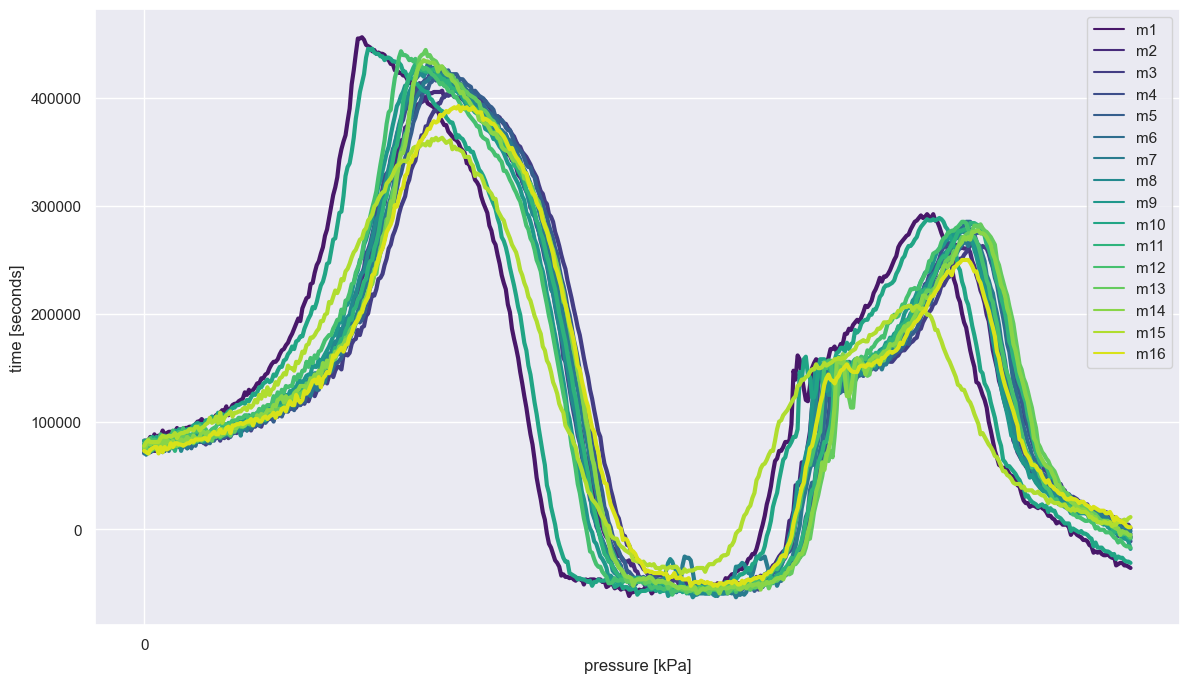

In [6]:
# Checkout all measurements into the same plot (To do this easily, first map columns into the same row adding new column with name "measurement")
df_exp_melt = pd.melt(df_exp, id_vars=['time'], value_vars=measurement_names, var_name='measurement', value_name='pressure')
print(df_exp.head(10))

# Now, plot multiple measurements
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_exp_melt, x ='time', y = 'pressure',
                  hue='measurement', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('time [seconds]')
plt.xlabel('pressure [kPa]')
plt.show()


In [12]:
# Statistics

# Calculate mean value for every time
df_exp['mean_pressure'] = df_exp.drop('time', axis=1).mean(axis=1)

# Calculate inter quartile range for every time
def calc_percentile(row):
    q3, q1 = np.percentile(row, [75, 25])
    row['mean_pressure'] = np.mean(row)
    row['q3'] = q3
    row['q1'] = q1
    return row

df_exp_time = df_exp['time']
df_exp = df_exp.drop('time', axis=1).apply(calc_percentile, axis=1)
df_exp['time'] = df_exp_time

# Delete measurement columns
df_exp_mean = df_exp.drop(measurement_names, axis=1)
df_exp_mean = pd.melt(df_exp_mean, id_vars=['time'], value_vars=['mean_pressure', 'q3', 'q1'], var_name='type', value_name='pressure')
df_exp.head()

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m12,m13,m14,m15,m16,m17,mean_pressure,q3,q1,time
225,82257.1,71630.4,72811.1,71630.4,71630.4,70449.7,78714.9,75172.6,76353.4,82257.1,...,77534.1,76353.4,75172.6,77534.1,72811.1,75172.6,75669.779313,77534.100000,72811.100000,0.000
226,82257.1,75172.6,72811.1,79895.6,70449.7,73991.9,69268.9,70449.7,73991.9,82257.1,...,79895.6,76353.4,77534.1,81076.3,71630.4,70449.7,75743.592813,79895.600000,71796.435938,0.005
227,82257.1,75172.6,72811.1,73991.9,72811.1,75172.6,77534.1,73991.9,77534.1,82257.1,...,77534.1,70449.7,83437.8,82257.1,70449.7,75172.6,76753.388376,80578.178125,73991.900000,0.010
228,85799.3,71630.4,73991.9,78714.9,71630.4,72811.1,75172.6,72811.1,75172.6,83437.8,...,84618.6,72811.1,78714.9,81076.3,73991.9,73991.9,76788.374992,79729.564062,72977.150000,0.015
229,83437.8,72811.1,73991.9,75172.6,73991.9,73991.9,77534.1,72811.1,78714.9,85799.3,...,81076.3,73991.9,81076.3,81076.3,75172.6,75172.6,77200.056204,80744.228125,73991.900000,0.020


In [10]:
# Percentage Root Mean Squared Error
error_perc = [(y_true - y_est)/y_true for y_true, y_est in zip(df_exp['mean_pressure'].tolist(), df_cfd_wc['pressure'].tolist())]
PRMSE = np.sqrt(np.mean(np.square(error_perc), axis=0))
print(np.round(PRMSE, 2))


17.95


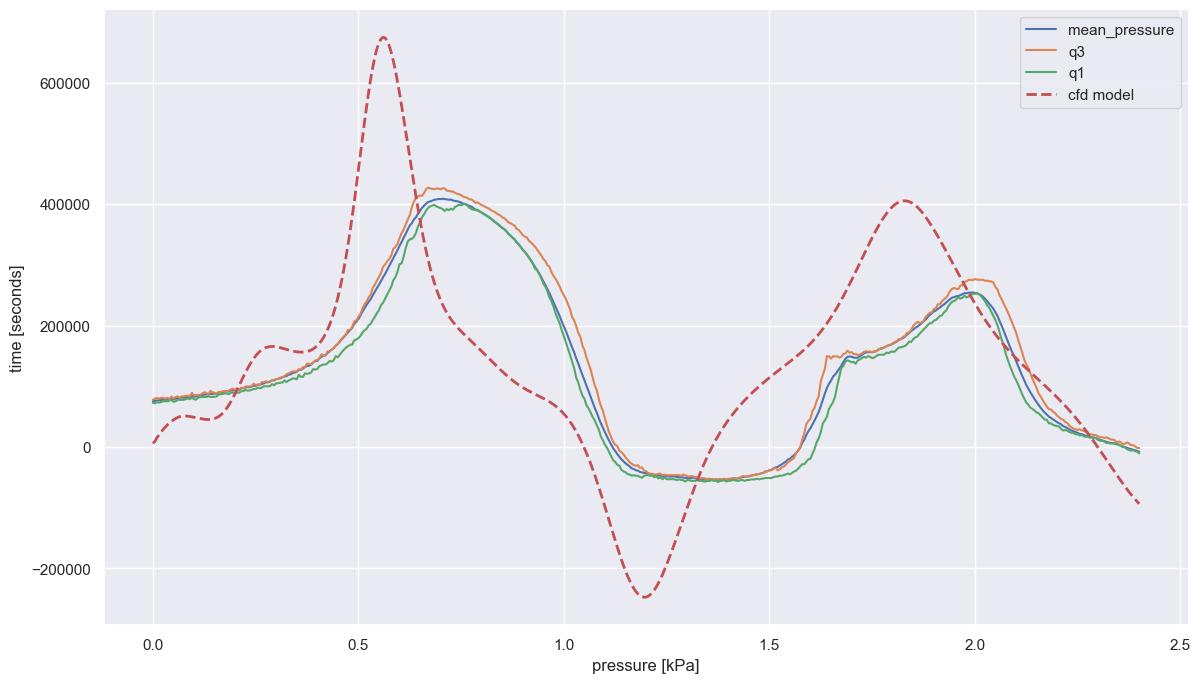

In [16]:
# Now, plot mean experimental data vs cfd data
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})
sns.lineplot(data=df_exp_mean, x='time', y='pressure', hue='type')
plt.plot(df_cfd_wc['time'], df_cfd_wc['pressure'], linewidth = 2, linestyle = 'dashed', label = 'cfd model')
plt.legend()
plt.ylabel('time [seconds]')
plt.xlabel('pressure [kPa]')
plt.show()
